<a href="https://colab.research.google.com/github/Rahul-Ag/Bitcoin-Price-Prediction/blob/main/SoC_Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all the useful libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

Reading the dataset

In [2]:
df = pd.read_csv('Bitcoin Price Data.csv')
# Bitcoin Price Data from 17-07-2010 to 30-06-2024
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,17-07-2010,0.0500,0.0500,0.0500,0.0500,0.0,170803.1525
1,18-07-2010,0.0858,0.0858,0.0858,0.0858,0.0,294746.5950
2,19-07-2010,0.0808,0.0808,0.0808,0.0808,0.0,277570.2200
3,20-07-2010,0.0747,0.0747,0.0747,0.0747,0.0,256710.1785
4,21-07-2010,0.0792,0.0792,0.0792,0.0792,0.0,274308.3750


Information about dataset

In [3]:
df.shape

(5098, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Volume,Market Cap
count,5098.000000,5098.000000,5098.000000,5098.000000,5.098000e+03,5.098000e+03
mean,11860.721853,12132.284238,11575.745177,11874.115216,2.138649e+10,2.235641e+11
std,17458.416528,17850.089619,17042.824297,17475.037756,3.375846e+10,3.360008e+11
min,0.050000,0.050000,0.050000,0.050000,0.000000e+00,1.708032e+05
25%,230.325500,234.723500,227.047250,230.413500,8.495045e+06,3.298236e+09
50%,2632.300000,2760.530000,2550.205000,2660.920000,1.227131e+09,4.348447e+10
75%,17129.437935,17497.910010,16877.115105,17121.125195,3.446390e+10,3.257500e+11
max,73082.350000,73628.430000,71333.360000,73087.950000,2.120000e+11,1.430000e+12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5098 entries, 0 to 5097
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5098 non-null   object 
 1   Open        5098 non-null   float64
 2   High        5098 non-null   float64
 3   Low         5098 non-null   float64
 4   Close       5098 non-null   float64
 5   Volume      5098 non-null   float64
 6   Market Cap  5098 non-null   float64
dtypes: float64(6), object(1)
memory usage: 278.9+ KB


Plotting the close price of Bitcoin

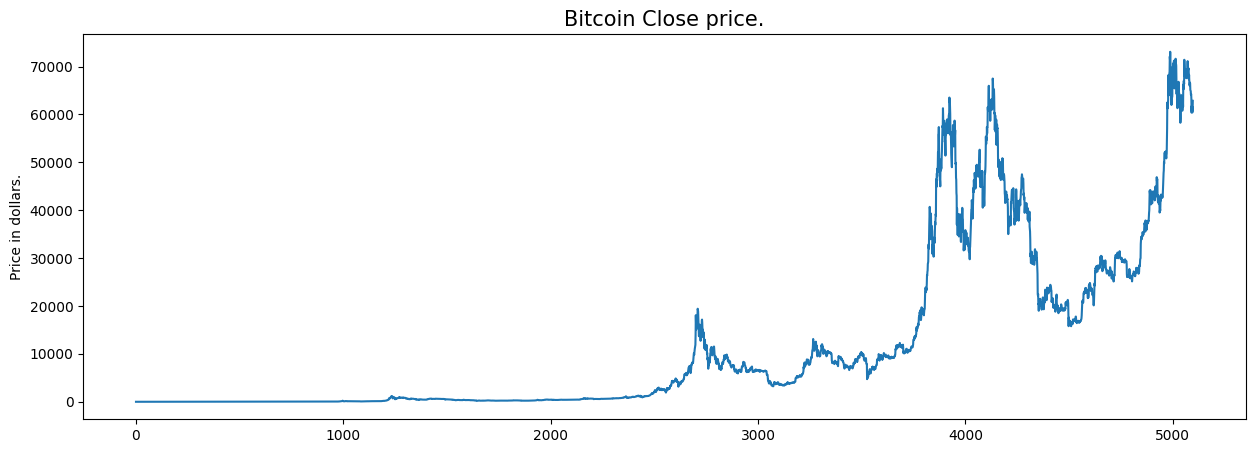

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

Checking for null entries

In [7]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Market Cap,0


No Null Entries

Plotting the Open, High, Low and Close Price of Bitcoin

<ipython-input-8-6728cd86ff93>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)
<ipython-input-8-6728cd86ff93>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
<ipython-input-8-6728cd86ff93>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new f

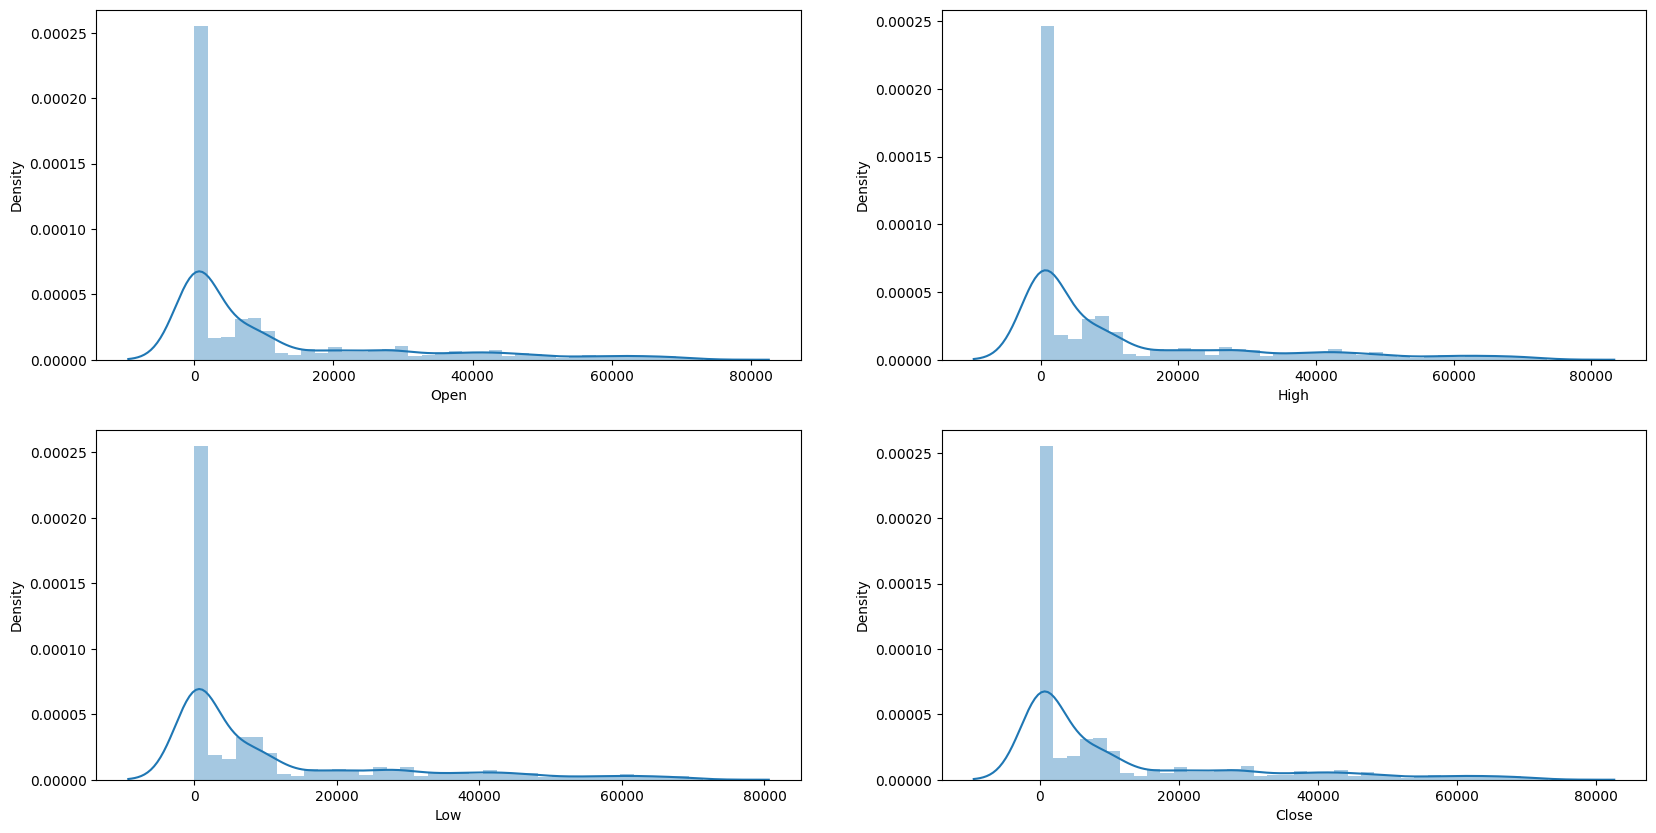

In [8]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.distplot(df[col])
plt.show()

Box Plot to check for Outliers

<ipython-input-9-e93153832e38>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


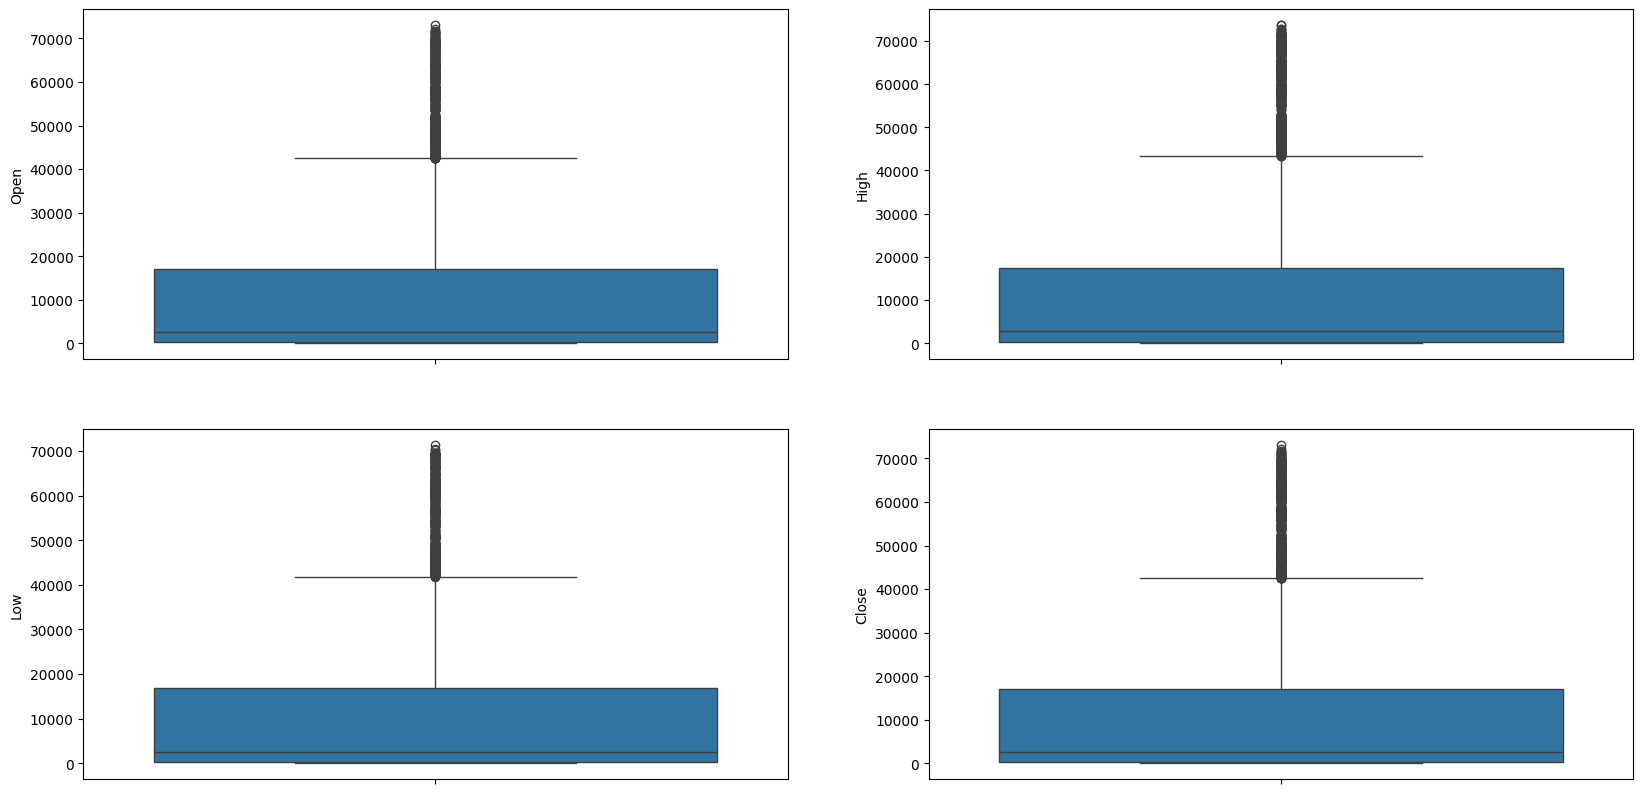

In [9]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sns.boxplot(df[col])
plt.show()

Splitting date in 3 columns to make it useful

In [10]:
# Convert 'Date' to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, year from 'Date'
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head()

<ipython-input-10-bd4104bf8973>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume,Market Cap,Day,Month,Year
0,2010-07-17,0.0500,0.0500,0.0500,0.0500,0.0,170803.1525,17,7,2010
1,2010-07-18,0.0858,0.0858,0.0858,0.0858,0.0,294746.5950,18,7,2010
2,2010-07-19,0.0808,0.0808,0.0808,0.0808,0.0,277570.2200,19,7,2010
3,2010-07-20,0.0747,0.0747,0.0747,0.0747,0.0,256710.1785,20,7,2010
4,2010-07-21,0.0792,0.0792,0.0792,0.0792,0.0,274308.3750,21,7,2010


<ipython-input-11-fb30b9f56fbe>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,i+1)


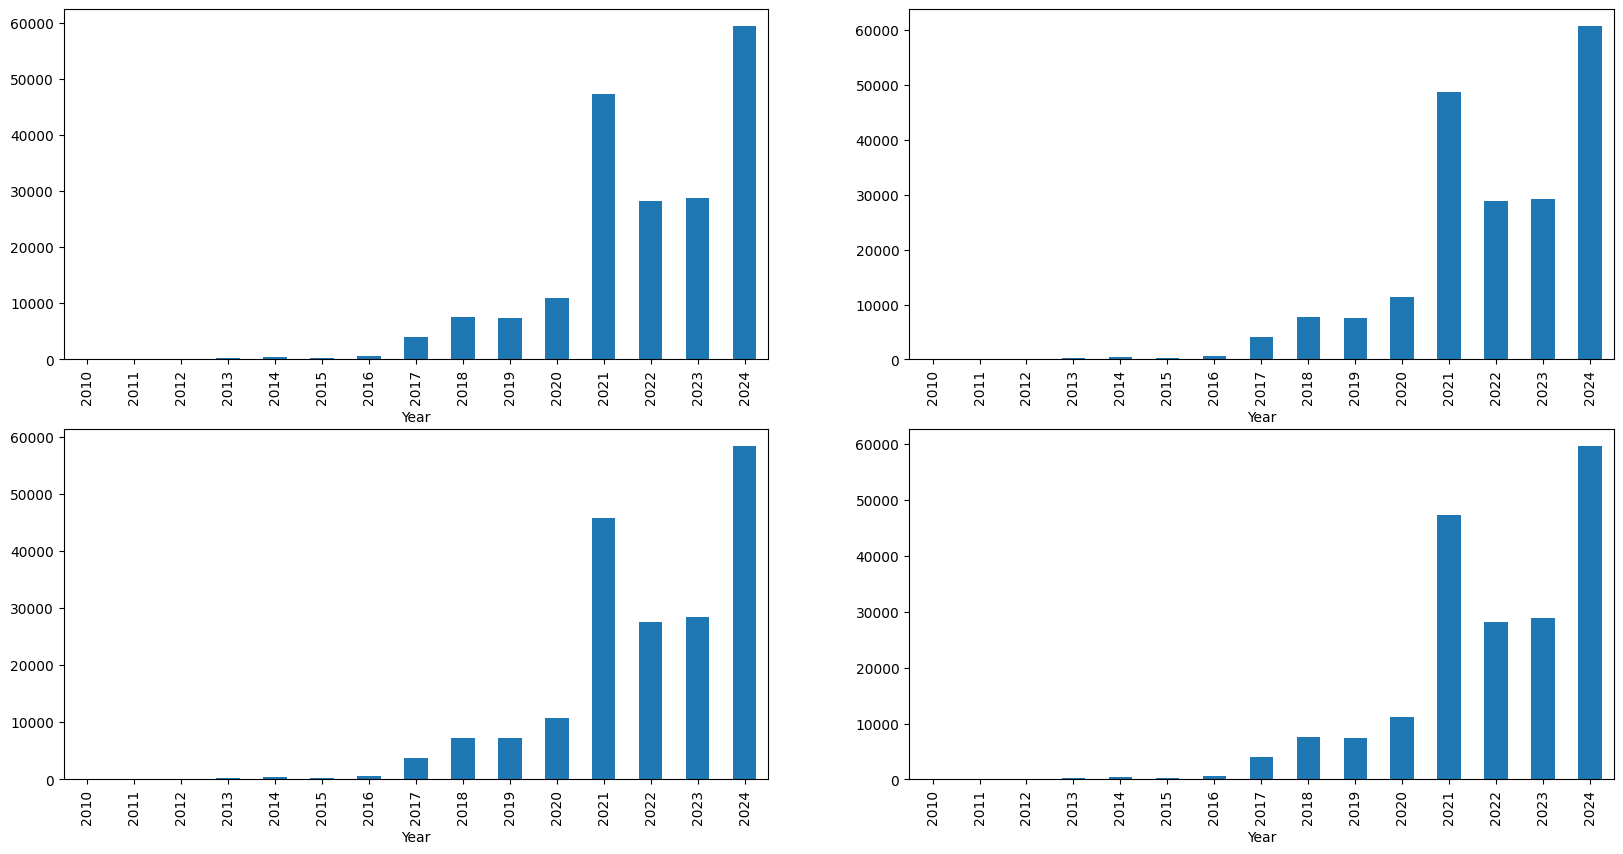

In [11]:
# Extract year
df['Year'] = df['Date'].dt.year

# Group by year and calculate the mean
data_grouped = df.groupby('Year').mean()

# Plotting
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

The price of bitcoin skyrocketed more than usual in 2021 and 2024, which resulted in so many outliers

Gathering some more useful information

In [12]:
df['is_quarter_end'] = np.where(df['Month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Day,Month,Year,is_quarter_end
0,2010-07-17,0.0500,0.0500,0.0500,0.0500,0.0,170803.1525,17,7,2010,0
1,2010-07-18,0.0858,0.0858,0.0858,0.0858,0.0,294746.5950,18,7,2010,0
2,2010-07-19,0.0808,0.0808,0.0808,0.0808,0.0,277570.2200,19,7,2010,0
3,2010-07-20,0.0747,0.0747,0.0747,0.0747,0.0,256710.1785,20,7,2010,0
4,2010-07-21,0.0792,0.0792,0.0792,0.0792,0.0,274308.3750,21,7,2010,0


In [13]:
df['open-close'] = df['Open'] - df['Close']
df['low-high'] = df['Low'] - df['High']

df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Day,Month,Year,is_quarter_end,open-close,low-high
0,2010-07-17,0.0500,0.0500,0.0500,0.0500,0.0,170803.1525,17,7,2010,0,0.0,0.0
1,2010-07-18,0.0858,0.0858,0.0858,0.0858,0.0,294746.5950,18,7,2010,0,0.0,0.0
2,2010-07-19,0.0808,0.0808,0.0808,0.0808,0.0,277570.2200,19,7,2010,0,0.0,0.0
3,2010-07-20,0.0747,0.0747,0.0747,0.0747,0.0,256710.1785,20,7,2010,0,0.0,0.0
4,2010-07-21,0.0792,0.0792,0.0792,0.0792,0.0,274308.3750,21,7,2010,0,0.0,0.0


To check whether any newly added features are highy correlated

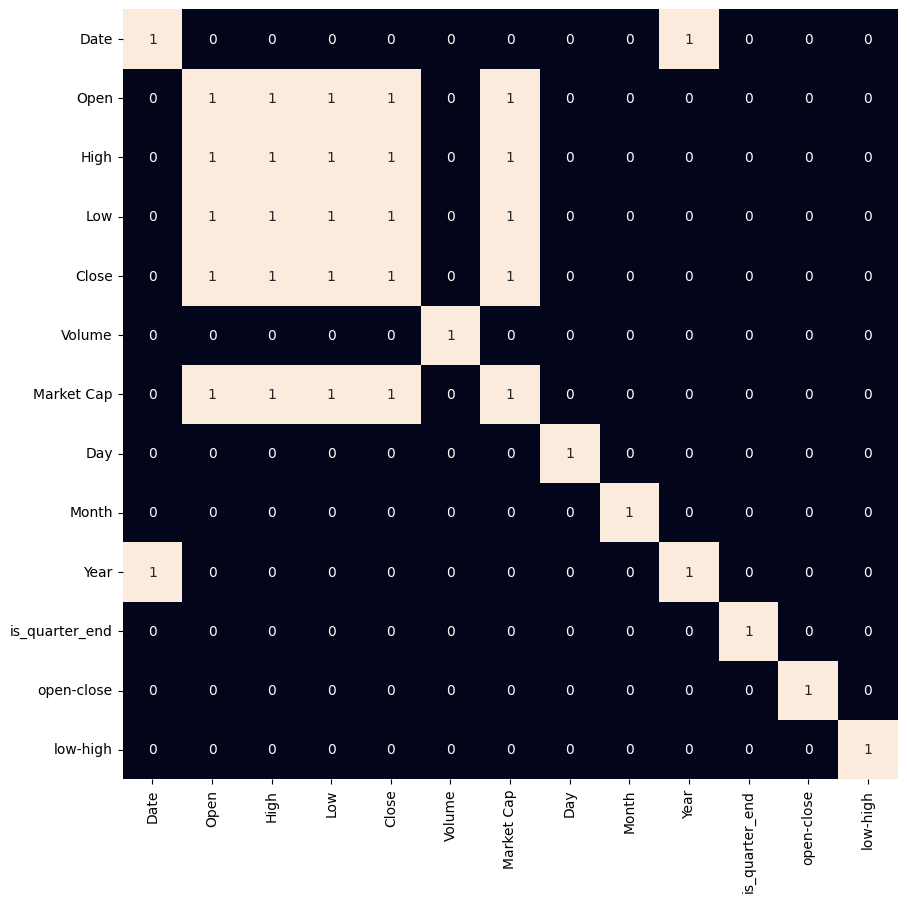

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

Training the model

In [15]:
features = df[['Open', 'High', 'Low', 'Volume', 'Market Cap', 'is_quarter_end', 'open-close', 'low-high', 'Day', 'Month', 'Year']]
target = df['Close']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_test, Y_train, Y_test = train_test_split(
	features, target, test_size=0.2, random_state=2022)
print(X_train.shape, X_test.shape)

(4078, 11) (1020, 11)


Linear Regression

In [16]:
model = LinearRegression()
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [17]:
from sklearn.model_selection import ShuffleSplit #ShuffleSplit will randomise the Samples
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), features, target, cv=cv)

array([1., 1., 1., 1., 1.])

In [18]:
# Root Mean Squared Error
print('Training RMSE : ', np.sqrt(metrics.mean_squared_error(Y_train, train_predictions)))
print('Test RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, test_predictions)))

Training RMSE :  1.3423596962361826e-11
Test RMSE :  1.3866518598917293e-11


In [19]:
model.score(X_test, Y_test)

1.0

Lasso

In [20]:
model_lasso = Lasso(alpha=0.01, max_iter=10000)
model_lasso.fit(X_train, Y_train)
train_predictions = model_lasso.predict(X_train)
test_predictions = model_lasso.predict(X_test)

In [21]:
# Root Mean Squared Error
print('Training RMSE : ', np.sqrt(metrics.mean_squared_error(Y_train, train_predictions)))
print('Test RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, test_predictions)))

Training RMSE :  2.417239549223216
Test RMSE :  2.1796354056799276


In [22]:
model_lasso.score(X_test, Y_test)

0.9999999856581603

Decision Tree

In [23]:
model_DT = DecisionTreeRegressor()
model_DT.fit(X_train, Y_train)
train_predictions = model_DT.predict(X_train)
test_predictions = model_DT.predict(X_test)

In [24]:
# Root Mean Squared Error
print('Training RMSE : ', np.sqrt(metrics.mean_squared_error(Y_train, train_predictions)))
print('Test RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, test_predictions)))

Training RMSE :  0.0
Test RMSE :  346.3283472348188


In [25]:
model_DT.score(X_test, Y_test)

0.9996379127446366

Random Forest

In [26]:
model_RF = RandomForestRegressor()
model_RF.fit(X_train, Y_train)
train_predictions = model_RF.predict(X_train)
test_predictions = model_RF.predict(X_test)

In [27]:
# Root Mean Squared Error
print('Training RMSE : ', np.sqrt(metrics.mean_squared_error(Y_train, train_predictions)))
print('Test RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test, test_predictions)))

Training RMSE :  113.15354344133145
Test RMSE :  280.1098213161532


In [28]:
model_RF.score(X_test, Y_test)

0.9997631388512492

# Function to predict Bitcoin Price

Function to get Weighted Averages of price wrt dates

In [29]:
from datetime import datetime

def calculate_weighted_average(df, date, feature_name):
    # Convert 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Calculate the difference in days between the given date and historical dates
    df['Date_Diff'] = (date - df['Date']).abs().dt.days

    # Calculate weights as the inverse of date difference (closer dates get higher weight)
    df['Weight'] = 1 / ((df['Date_Diff'] + 1) ** 5)  # Adding 1 to avoid division by zero

    # Calculate the weighted average for the feature
    weighted_avg = np.sum(df[feature_name] * df['Weight']) / np.sum(df['Weight'])

    return weighted_avg

Price Predictor Function

In [31]:
def PredictedPrice(Day, Month, Year):
    # Convert the input date
    input_date = pd.to_datetime(f'{Year}-{Month}-{Day}')

    # Calculate weighted averages for each feature
    open_value = calculate_weighted_average(df.copy(), input_date, 'Open') # Create a copy of df for each feature
    close_value = calculate_weighted_average(df.copy(), input_date, 'Close')
    high_value = calculate_weighted_average(df.copy(), input_date, 'High')
    low_value = calculate_weighted_average(df.copy(), input_date, 'Low')
    volume_value = calculate_weighted_average(df.copy(), input_date, 'Volume')
    market_cap_value = calculate_weighted_average(df.copy(), input_date, 'Market Cap')

    # Calculate additional features
    is_quarter_end = 1 if Month % 3 == 0 else 0
    open_close_diff = open_value - close_value
    low_high_diff = low_value - high_value

    # Create input data
    input_data = pd.DataFrame({
        'Open': [open_value],
        'High': [high_value],
        'Low': [low_value],
        'Volume': [volume_value],
        'Market Cap': [market_cap_value],
        'is_quarter_end': [is_quarter_end],
        'open-close': [open_close_diff],
        'low-high': [low_high_diff],
        'Day': [Day],
        'Month': [Month],
        'Year': [Year]
    })

    # Scale the input data
    input_data_scaled = scaler.transform(input_data)

    # Predict using all the models
    prediction_lr = model.predict(input_data_scaled)
    prediction_lasso = model_lasso.predict(input_data_scaled)
    prediction_dt = model_DT.predict(input_data_scaled)
    prediction_rf = model_RF.predict(input_data_scaled)

    # Calculate the average prediction
    average_prediction = (prediction_lr + prediction_lasso + prediction_dt + prediction_rf) / 4
    #print("Linear Regression Prediction:", prediction_lr)
    #print("Lasso Regression Prediction:", prediction_lasso)
    #print("Decision Tree Prediction:", prediction_dt)
    #print("Random Forest Prediction:", prediction_rf)
    return average_prediction[0]  # Return the average prediction

In [35]:
# Example usage:
predicted_price = PredictedPrice(4, 8, 2024)
print(f"Predicted Bitcoin Price: {predicted_price}")

Predicted Bitcoin Price: 63800.83202383627
